In [1]:
import pandas as pd
import numpy as np

In [2]:
xGoalsCity = pd.read_html('https://fbref.com/en/matches/b0d9b0e1/Manchester-City-Real-Madrid-April-17-2024-Champions-League', attrs={"id":"shots_b8fd03ef"})[0]
xGoalsMadrid = pd.read_html('https://fbref.com/en/matches/b0d9b0e1/Manchester-City-Real-Madrid-April-17-2024-Champions-League', attrs={"id":"shots_53a2f082"})[0]

In [3]:
cityArray = xGoalsCity["Unnamed: 3_level_0"].to_numpy()
cityArray = cityArray[~np.isnan(cityArray)]
print(cityArray)

[0.05 0.19 0.16 0.34 0.06 0.03 0.01 0.11 0.02 0.08 0.02 0.04 0.06 0.04
 0.02 0.03 0.02 0.06 0.29 0.05 0.16 0.03 0.05 0.02 0.1  0.21 0.08 0.01
 0.29 0.03 0.03 0.06 0.05]


In [4]:
MadridArray = xGoalsMadrid["Unnamed: 3_level_0"].to_numpy()
MadridArray = MadridArray[~np.isnan(MadridArray)]
print(MadridArray)

[0.02 0.56 0.7  0.17 0.01 0.02 0.32 0.04]


In [5]:
print(f"Manchester City: {len(cityArray)} shots, xG: {cityArray.sum()}\nManchester United: {len(MadridArray)} shots, xG: {MadridArray.sum()}")

Manchester City: 33 shots, xG: 2.8
Manchester United: 8 shots, xG: 1.8400000000000003


In [6]:
def simulate_match(team_a_xgs, team_b_xgs):
    team_a_shots_simulation = np.random.random_sample(len(team_a_xgs))
    team_b_shots_simulation = np.random.random_sample(len(team_b_xgs))

    team_a_goals = (team_a_shots_simulation <= team_a_xgs).sum()
    team_b_goals = (team_b_shots_simulation <= team_b_xgs).sum()


    return [team_a_goals, team_b_goals]

print(simulate_match(cityArray, MadridArray))

[3, 1]


In [7]:
n_times = 500000
result = []
for i in range(n_times):
    result.append(simulate_match(team_a_xgs=cityArray, team_b_xgs=MadridArray))

result = pd.DataFrame(result, columns=["City", "Madrid"])

result


,City,Madrid
0,2,3
1,1,1
2,2,2
3,2,2
4,2,0
...,...,...
499995,4,2
499996,1,2
499997,3,3
499998,1,2


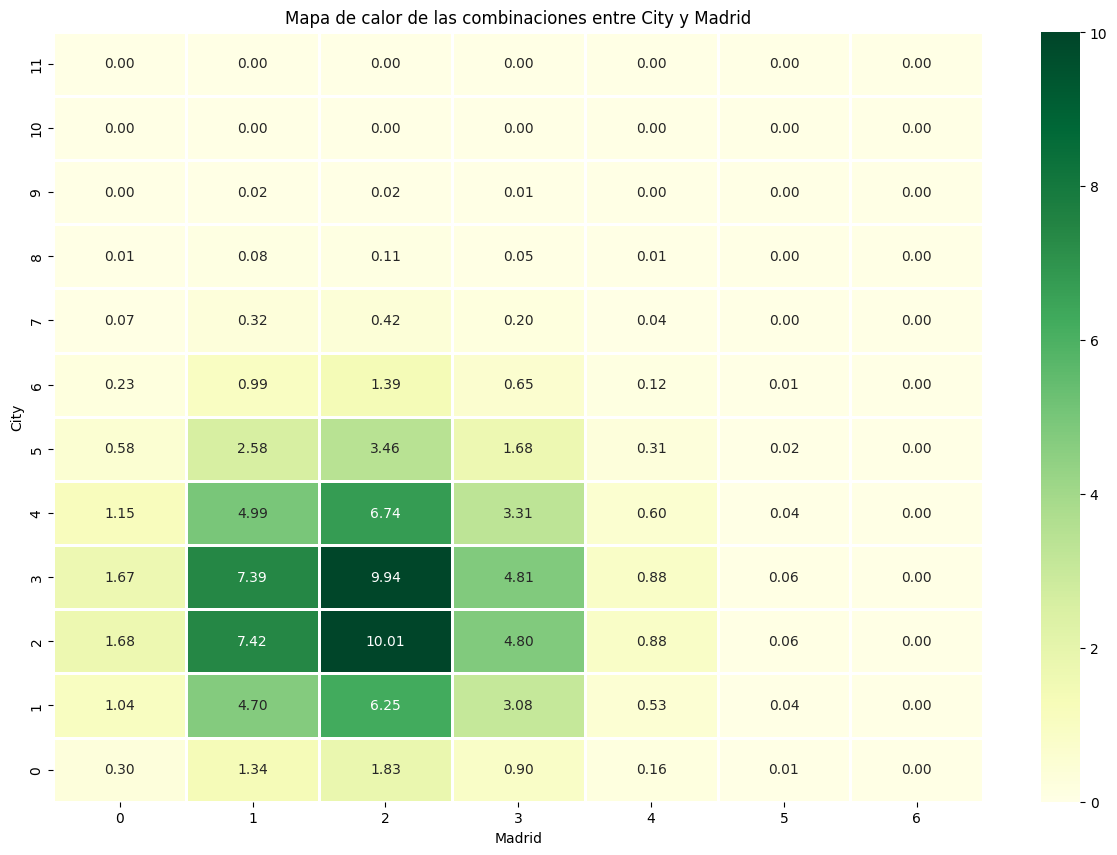

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Crear una tabla cruzada de las dos columnas
#cross_tab = pd.crosstab(result['City'], result['Madrid'])
cross_tab = pd.crosstab(result['City'], result['Madrid'], normalize='all') * 100

# Crear el mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(cross_tab, annot=True, fmt=".2f", cmap="YlGn", linewidth=2)
plt.gca().invert_yaxis()
plt.xlabel('Madrid')
plt.ylabel('City')
plt.title('Mapa de calor de las combinaciones entre City y Madrid')
plt.show()

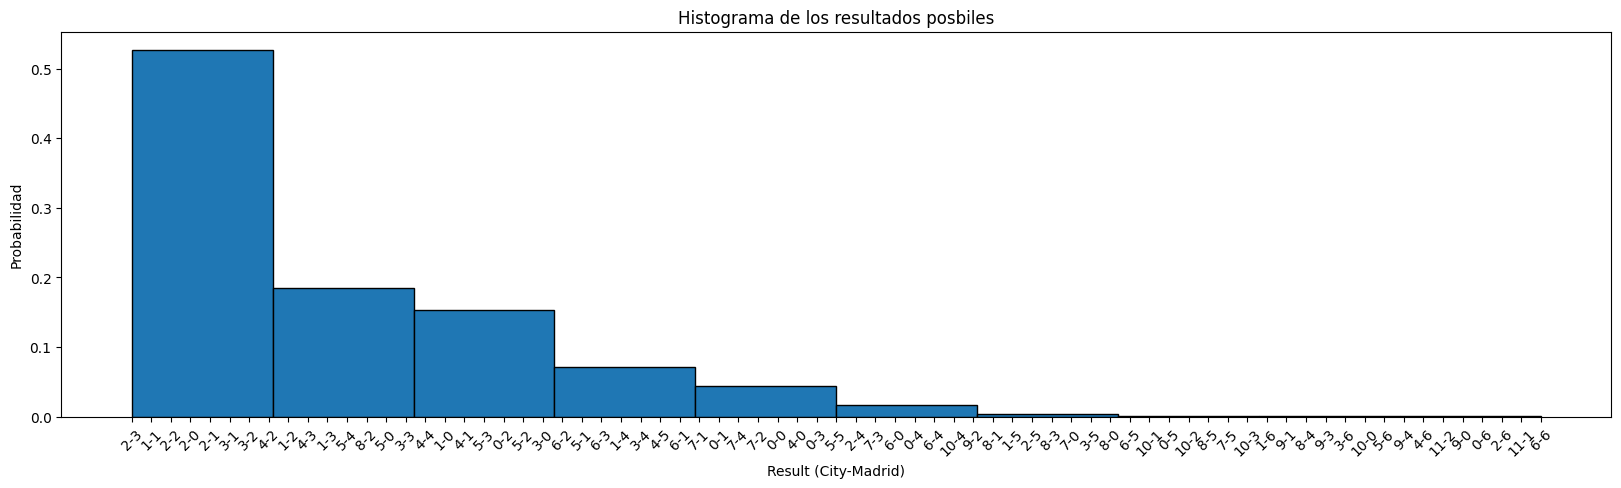

In [9]:
result["result"] = result.apply(lambda x: f"{x['City']}-{x['Madrid']}", axis=1)

plt.figure(figsize=(20, 5))
plt.hist(result["result"], weights=[1/len(result)]*len(result), edgecolor='black')
plt.xlabel('Result (City-Madrid)')
plt.ylabel('Probabilidad')
plt.title('Histograma de los resultados posbiles')
plt.xticks(rotation=45)
plt.show()